In [22]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tree based anomaly detection algorithm hence present in ensemble module
from sklearn.ensemble import IsolationForest
# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo


In [ ]:
# Load the dataset
air_quality = fetch_ucirepo(id=360) #id 360 corresponds to the air quality dataset


In [24]:
# Check the dataset
air_quality

{'data': {'ids': None,
  'features':            Date      Time  CO(GT)  PT08.S1(CO)  ...  PT08.S5(O3)     T    RH      AH
  0     3/10/2004  18:00:00     2.6         1360  ...         1268  13.6  48.9  0.7578
  1     3/10/2004  19:00:00     2.0         1292  ...          972  13.3  47.7  0.7255
  2     3/10/2004  20:00:00     2.2         1402  ...         1074  11.9  54.0  0.7502
  3     3/10/2004  21:00:00     2.2         1376  ...         1203  11.0  60.0  0.7867
  4     3/10/2004  22:00:00     1.6         1272  ...         1110  11.2  59.6  0.7888
  ...         ...       ...     ...          ...  ...          ...   ...   ...     ...
  9352   4/4/2005  10:00:00     3.1         1314  ...         1729  21.9  29.3  0.7568
  9353   4/4/2005  11:00:00     2.4         1163  ...         1269  24.3  23.7  0.7119
  9354   4/4/2005  12:00:00     2.4         1142  ...         1092  26.9  18.3  0.6406
  9355   4/4/2005  13:00:00     2.1         1003  ...          770  28.3  13.5  0.5139
  9356  

In [25]:
# convert to pandas dataframe
df = air_quality.data.features
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [26]:
# Select the specific columns for anomaly detection
features = df[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]
features.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116


In [27]:
features.isna().sum()


CO(GT)      0
C6H6(GT)    0
NOx(GT)     0
NO2(GT)     0
dtype: int64

In [28]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    9357 non-null   float64
 1   C6H6(GT)  9357 non-null   float64
 2   NOx(GT)   9357 non-null   int64  
 3   NO2(GT)   9357 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 292.5 KB


In [29]:
# Parameters for isolation forest
n_estimators = 120
# To select random samples, we use auto which is the default value and it is recommended to use auto for large datasets
contamination = 0.01 # Proportion of outliers in the data set
sample_size = 256 # Number of sampleds used to train each base estimator


In [30]:
# Train the isolation forest model
model = IsolationForest(n_estimators=n_estimators, max_samples=max_samples, contamination=contamination, random_state=42)
model.fit(features)

# Predict anomalies
# -1 for anomalies and 1 for normal data points
anomaly_labels = model.predict(features)
anomaly_labels



array([1, 1, 1, ..., 1, 1, 1])

In [31]:
features['anomaly'] = anomaly_labels

C:\Users\rutwi\AppData\Local\Temp\ipykernel_12264\783948545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['anomaly'] = anomaly_labels


In [32]:
# Count the number of anomalies and normal data points
anomaly_counts = features['anomaly'].value_counts()
print(anomaly_counts)

anomaly
 1    9263
-1      94
Name: count, dtype: int64


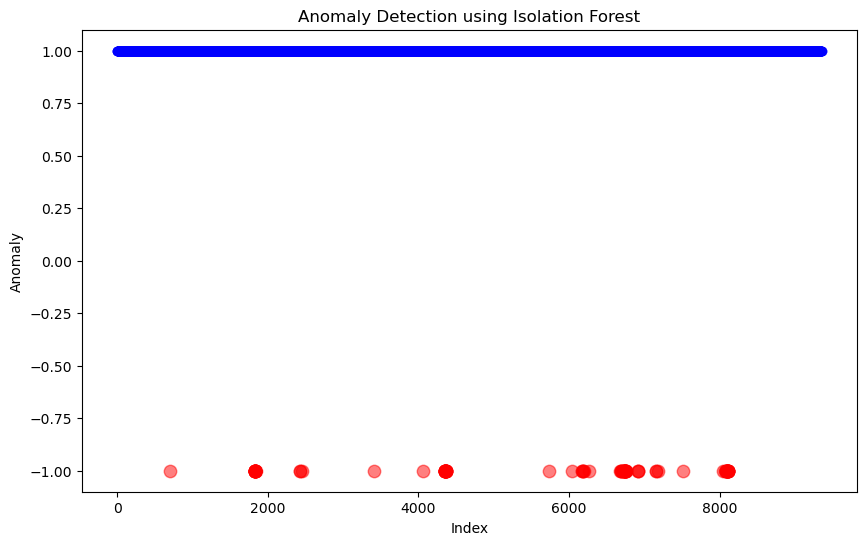

In [ ]:
# Visualization anomalies using scatter plot
plt.figure(figsize=(10,6))

# Plot normal instances
normal_data = features[features['anomaly']==1]
# Here index is used to get the row number and 'anomaly' column is used to get the value of anomaly which is 1 for normal data points
# Here alpha is used to make the points transparent so that we can see the overlapping points clearly
plt.scatter(normal_data.index, normal_data['anomaly'], color='blue', label='Normal', alpha=0.5)

# Plot anomalies
anomalies = features[features['anomaly']==-1]
plt.scatter(anomalies.index, anomalies['anomaly'], color='red', label='Anomaly', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Anomaly')
plt.title('Anomaly Detection using Isolation Forest')
plt.show()

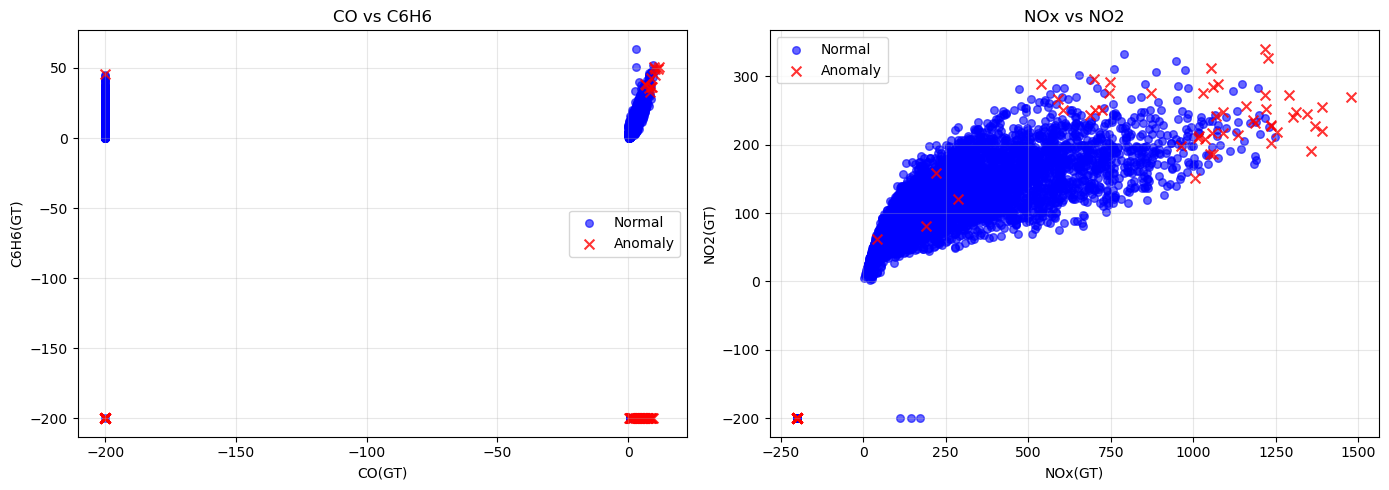

Normal data points: 9263
Anomalies detected: 94


In [38]:
# Visualize anomalies - Multiple feature comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]
 
# Plot 1: CO vs C6H6
axes[0].scatter(normal['CO(GT)'], normal['C6H6(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0].scatter(anomaly['CO(GT)'], anomaly['C6H6(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0].set_xlabel('CO(GT)')
axes[0].set_ylabel('C6H6(GT)')
axes[0].set_title('CO vs C6H6')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
 
# Plot 2: NOx vs NO2
axes[1].scatter(normal['NOx(GT)'], normal['NO2(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1].scatter(anomaly['NOx(GT)'], anomaly['NO2(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].set_title('NOx vs NO2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
 
plt.tight_layout()
plt.show()
 
print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")
 

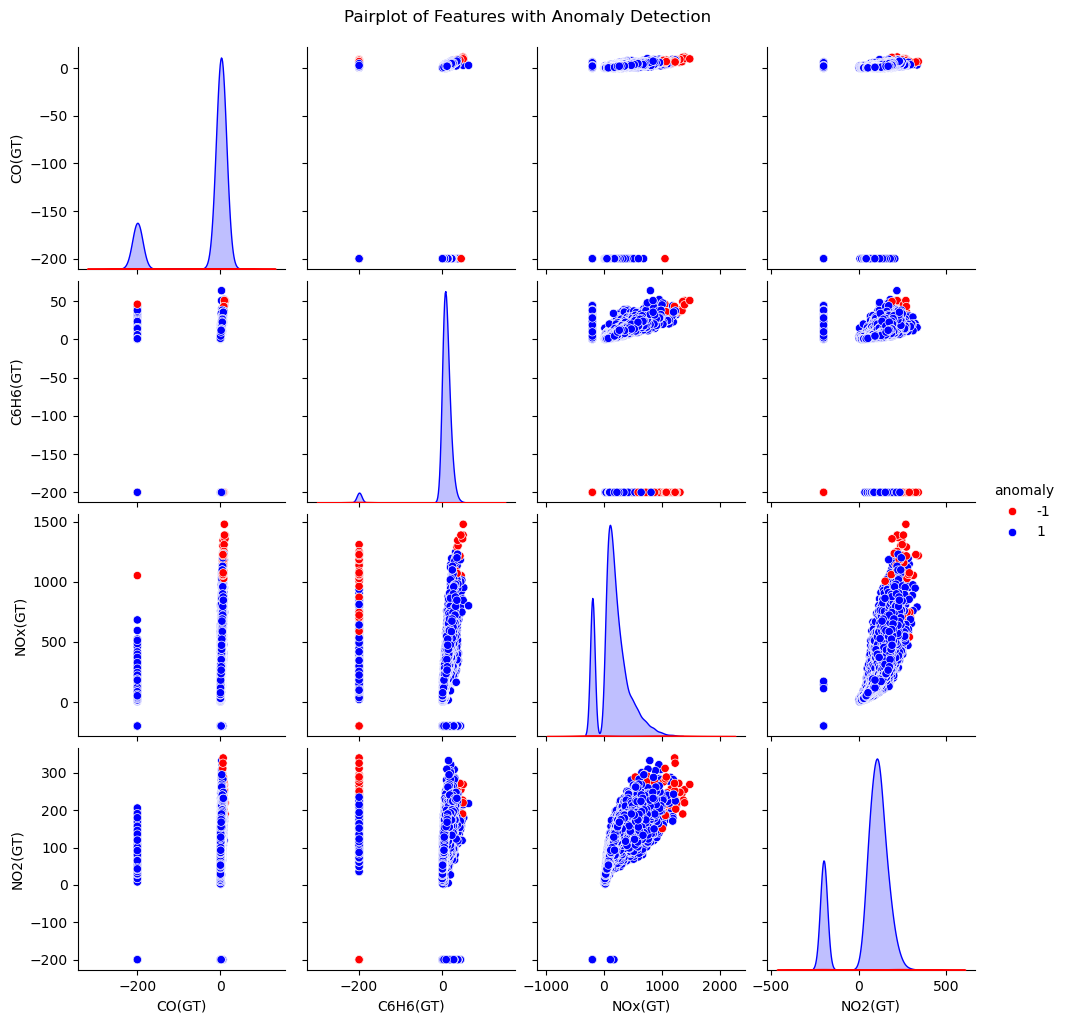

In [41]:
# Plot for comparing all features
sns.pairplot(features, hue='anomaly', palette={1: 'blue', -1: 'red'}, diag_kind='kde')
plt.suptitle('Pairplot of Features with Anomaly Detection', y=1.02)
plt.show()

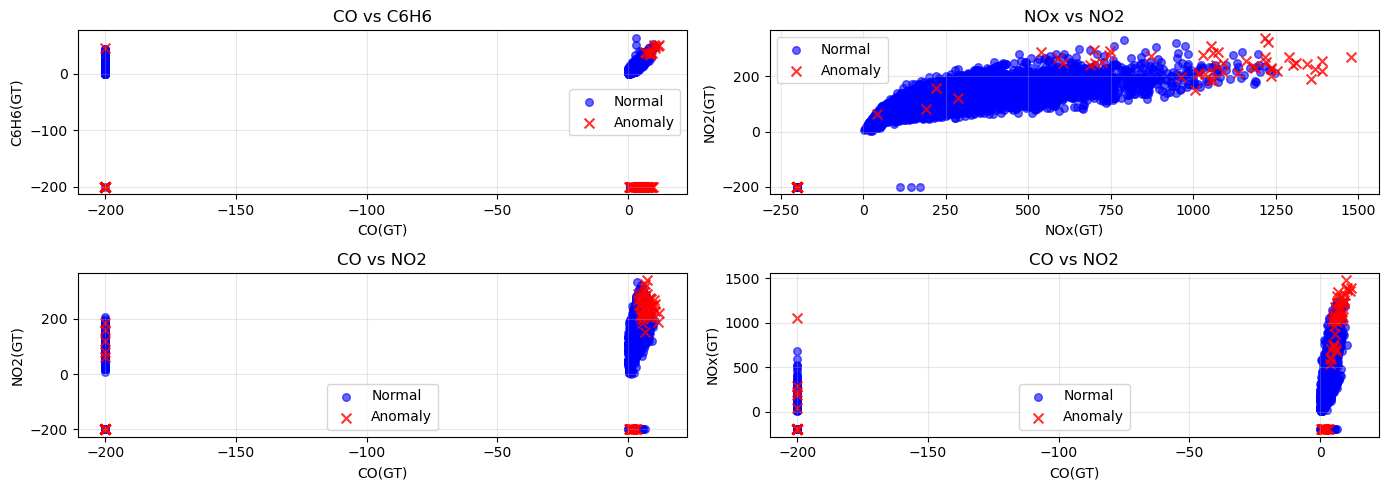

Normal data points: 9263
Anomalies detected: 94


In [46]:
# Plot to compare 4 features with anomalies 4 - D visualization using scatter plot
# Visualize anomalies - Multiple feature comparisons
fig, axes = plt.subplots(2, 2, figsize=(14, 5))
 
normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]
 
# Plot 1: CO vs C6H6
axes[0,0].scatter(normal['CO(GT)'], normal['C6H6(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0,0].scatter(anomaly['CO(GT)'], anomaly['C6H6(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0,0].set_xlabel('CO(GT)')
axes[0,0].set_ylabel('C6H6(GT)')
axes[0,0].set_title('CO vs C6H6')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
 
# Plot 2: NOx vs NO2
axes[0, 1].scatter(normal['NOx(GT)'], normal['NO2(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0, 1].scatter(anomaly['NOx(GT)'], anomaly['NO2(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0, 1].set_xlabel('NOx(GT)')
axes[0, 1].set_ylabel('NO2(GT)')
axes[0, 1].set_title('NOx vs NO2')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: CO vs NO2
axes[1,0].scatter(normal['CO(GT)'], normal['NO2(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1,0].scatter(anomaly['CO(GT)'], anomaly['NO2(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1,0].set_xlabel('CO(GT)')
axes[1,0].set_ylabel('NO2(GT)')
axes[1,0].set_title('CO vs NO2')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 3: CO vs NOx
axes[1,1].scatter(normal['CO(GT)'], normal['NOx(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1,1].scatter(anomaly['CO(GT)'], anomaly['NOx(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1,1].set_xlabel('CO(GT)')
axes[1,1].set_ylabel('NOx(GT)')
axes[1,1].set_title('CO vs NO2')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)
 
plt.tight_layout()
plt.show()
 
print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")
 


In [45]:
import plotly.graph_objects as go
import numpy as np
 
# Separate normal and anomaly
normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]
 
fig = go.Figure()
 
# Normal points
fig.add_trace(go.Scatter3d(
    x=normal['CO(GT)'],
    y=normal['C6H6(GT)'],
    z=normal['NOx(GT)'],
    mode='markers',
    name='Normal',
    marker=dict(
        size=6,
        color=normal['NO2(GT)'],   # 4th dimension as color
        colorscale='Blues',
        opacity=0.6,
        colorbar=dict(title='NO2(GT)')
    )
))
 
# Anomaly points
fig.add_trace(go.Scatter3d(
    x=anomaly['CO(GT)'],
    y=anomaly['C6H6(GT)'],
    z=anomaly['NOx(GT)'],
    mode='markers',
    name='Anomaly',
    marker=dict(
        size=8,
        color=anomaly['NO2(GT)'],
        colorscale='Reds',
        opacity=0.9,
        symbol='diamond'
    )
))
 
# Layout
fig.update_layout(
    title='4D Scatter Plot (Color = NO2(GT))',
    scene=dict(
        xaxis_title='CO(GT)',
        yaxis_title='C6H6(GT)',
        zaxis_title='NOx(GT)'
    ),
    width=900,
    height=700
)
 
fig.show()
 
 